https://towardsdatascience.com/cifar-100-transfer-learning-using-efficientnet-ed3ed7b89af2

In [1]:
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
from keras.metrics import top_k_categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator

2023-06-17 14:32:18.209718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
TEST_PATH = "dataset/test/"
TEST_DIRS = glob.glob("dataset/test/*")

MODELS = ["sg-food-233-xception", "sg-food-233-densenet121", "sg-food-233-densenet201",
          "sg-food-233-resnet152v2", "sg-food-233-inceptionv3", "sg-food-233-inceptionresnetv2"]
CHECKPOINT_PATHS = ["checkpoints/" + MODEL + ".h5" for MODEL in MODELS]
MODEL_PATHS = ["models/" + MODEL + ".h5" for MODEL in MODELS]

MISMATCHED_ENSEMBLE_RESULT_PATHS = ["mismatched_ensemble_result1.csv", "mismatched_ensemble_result2.csv",
                                    "mismatched_ensemble_result3.csv"]

IMAGE_SIZE = 512

In [3]:
def acc_top5(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [4]:
def load_models():
    loaded_models = []
    for CHECKPOINT_PATH in CHECKPOINT_PATHS:
        loaded_models.append(load_model(CHECKPOINT_PATH, custom_objects={"acc_top5": acc_top5}))
    print("Models Loaded")
    return loaded_models

In [5]:
models = load_models()

/Users/hjj/anaconda3/envs/food-recognition/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:325: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


Models Loaded


In [6]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory(
    TEST_PATH,
    batch_size=1,
    shuffle=False,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical")
filenames = test_data.filenames

Found 10700 images belonging to 233 classes.


In [7]:
categories = list(test_data.class_indices.keys())

In [8]:
def evaluate(model):
    test_score = model.evaluate(test_data)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print("Test Accuracy Top 5: ", test_score[2])

In [9]:
for i, model in enumerate(models):
    print("=" * 100)
    print(MODELS[i])
    evaluate(model)
    print("=" * 100)

sg-food-233-xception


2023-06-16 01:37:27.413611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 3092s 289ms/step - loss: 1.2751 - accuracy: 0.6908 - acc_top5: 0.8924
Test Loss:  1.2751357555389404
Test Accuracy:  0.6908411383628845
Test Accuracy Top 5:  0.8924298882484436
sg-food-233-densenet121


2023-06-16 02:28:59.702671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 4146s 387ms/step - loss: 1.3221 - accuracy: 0.6870 - acc_top5: 0.8860
Test Loss:  1.3221131563186646
Test Accuracy:  0.687009334564209
Test Accuracy Top 5:  0.8859813213348389
sg-food-233-densenet201


2023-06-16 03:38:05.441791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 6683s 624ms/step - loss: 1.2958 - accuracy: 0.7030 - acc_top5: 0.8949
Test Loss:  1.2957532405853271
Test Accuracy:  0.7029906511306763
Test Accuracy Top 5:  0.894859790802002
sg-food-233-resnet152v2


2023-06-16 05:29:28.456937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 6355s 593ms/step - loss: 1.2049 - accuracy: 0.7040 - acc_top5: 0.8980
Test Loss:  1.2049247026443481
Test Accuracy:  0.7040187120437622
Test Accuracy Top 5:  0.8980373740196228
sg-food-233-inceptionv3


2023-06-16 07:15:24.001282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 1851s 173ms/step - loss: 1.4831 - accuracy: 0.6319 - acc_top5: 0.8601
Test Loss:  1.483106255531311
Test Accuracy:  0.6318691372871399
Test Accuracy Top 5:  0.8600934743881226
sg-food-233-inceptionresnetv2


2023-06-16 07:46:14.777608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10700/10700 [==============================] - 4114s 384ms/step - loss: 1.2326 - accuracy: 0.6899 - acc_top5: 0.8954
Test Loss:  1.232588529586792
Test Accuracy:  0.6899065375328064
Test Accuracy Top 5:  0.8954205513000488


In [10]:
def get_label(row, reduction="mean"):
    max_freq_predictions = []
    predictions = row.iloc[2:len(MODELS)+2]
    label_counts = row.iloc[len(MODELS)+2:]
    max_freq_labels = label_counts[label_counts == label_counts.max()].index.tolist()
    for max_freq_label in max_freq_labels:
        scores = []
        for prediction in predictions:
            label, score = prediction
            if label == max_freq_label:
                scores.append(score)
        if reduction == "mean":
            max_freq_score = 0 if len(scores) == 0 else sum(scores) / len(scores)
        else:
            max_freq_score = 0 if len(scores) == 0 else max(scores)
        max_freq_predictions.append([max_freq_label, max_freq_score])
    return max(max_freq_predictions, key=lambda item: item[1])[0]

In [11]:
def predict1(model, filepath):
    test_image = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    test_image_array = img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)
    test_image_array = test_image_array / 255.
    predictions = model.predict(test_image_array, verbose=0)
    predicted_labels = np.argsort(predictions[0])[::-1]
    predicted_scores = predictions[0][predicted_labels]
    return predicted_labels, predicted_scores

In [12]:
def predict2(model):
    predicted_labels = []
    predicted_scores = []
    with tqdm(total=len(test_data.filepaths)) as pbar:
        for i, filepath in enumerate(test_data.filepaths):
            pbar.set_description("Predicting: %d" % (1 + i))
            pbar.update(1)
            test_image = load_img(filepath, target_size=(IMAGE_SIZE, IMAGE_SIZE))
            test_image_array = img_to_array(test_image)
            test_image_array = np.expand_dims(test_image_array, axis=0)
            test_image_array = test_image_array / 255.
            predictions = model.predict(test_image_array, verbose=0)
            predicted_label = np.argsort(predictions[0])[::-1][0]
            predicted_score = predictions[0][predicted_label]
            predicted_labels.append(predicted_label)
            predicted_scores.append(predicted_score)
    return predicted_labels, predicted_scores

In [13]:
def ensemble_predict1():
    all_predictions = []
    with tqdm(total=len(test_data.filepaths)) as pbar:
        for i, filepath in enumerate(test_data.filepaths):
            pbar.set_description("Predicting: %d" % (1 + i))
            pbar.update(1)
            predictions = {}
            for model in models:
                predicted_labels, predicted_scores = predict1(model, filepath)
                for j, label in enumerate(predicted_labels):
                    if categories[predicted_labels[j]] in predictions:
                        if predictions[categories[predicted_labels[j]]] < predicted_scores[j]:
                            predictions[categories[predicted_labels[j]]] = predicted_scores[j]
                    else:
                        predictions[categories[predicted_labels[j]]] = predicted_scores[j]
            predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True))
            all_predictions.append(list(predictions.keys())[0])

    true_names = []
    for i in range(len(filenames)):
        true_names.append(categories[test_data.labels[i]])
    return pd.DataFrame({"Filename": filenames, "True": true_names, "Prediction": all_predictions})

In [14]:
def ensemble_predict2(reduction="mean"):
    all_predictions = []
    for model in models:
        predictions = []
        predicted_labels, predicted_scores = predict2(model)
        for i, label in enumerate(predicted_labels):
            predictions.append([categories[predicted_labels[i]], predicted_scores[i]])
        all_predictions.append(predictions)
    all_predictions_df = pd.DataFrame(all_predictions).transpose()
    all_predictions_df.columns = ["Prediction" + str(i + 1) for i in range(all_predictions_df.shape[1])]

    true_names = []
    for i in range(len(filenames)):
        true_names.append(categories[test_data.labels[i]])
    ensemble_result = pd.concat([pd.DataFrame({"Filename": filenames, "True": true_names}),
                                 all_predictions_df], axis=1)
    label_counts = ensemble_result.apply(lambda row: pd.Series([item[0] for item in row]).value_counts(),
                                         axis=1).fillna(0)
    ensemble_result = pd.concat([ensemble_result, label_counts], axis=1)
    ensemble_result["Prediction"] = ensemble_result.apply(lambda row: get_label(row, reduction), axis=1)
    ensemble_result = ensemble_result[["Filename", "True", "Prediction"]]
    return ensemble_result

In [15]:
ensemble_result1 = ensemble_predict1()

Predicting: 1:   0%|                                              | 0/10700 [00:00<?, ?it/s]

Predicting: 10700: 100%|████████████████████████████| 10700/10700 [8:57:43<00:00,  3.02s/it]


In [58]:
ensemble_result2 = ensemble_predict2(reduction="mean")

Predicting: 10700: 100%|████████████████████████████| 10700/10700 [1:17:36<00:00,  2.30it/s]


In [ ]:
ensemble_result3 = ensemble_predict2(reduction="max")

Predicting: 10044:  94%|██████████████████████████▎ | 10044/10700 [2:16:19<14:23,  1.32s/it]

In [ ]:
def get_mismatched_ensemble_result(result):
    test_accuracy = result.loc[(result["Prediction"] == result["True"])].shape[0] / result.shape[0]
    mismatched_result = result.loc[~(result["Prediction"] == result["True"])]
    print("Test Accuracy: " + str(test_accuracy) + ", Mismatch: " + str(len(mismatched_result)))
    return mismatched_result

In [61]:
mismatched_ensemble_result1 = get_mismatched_ensemble_result(ensemble_result1)

Test Accuracy: 0.7461682242990654, Mismatch: 2716


In [62]:
mismatched_ensemble_result2 = get_mismatched_ensemble_result(ensemble_result2)

Test Accuracy: 0.7535514018691589, Mismatch: 2637


In [ ]:
mismatched_ensemble_result3 = get_mismatched_ensemble_result(ensemble_result2)

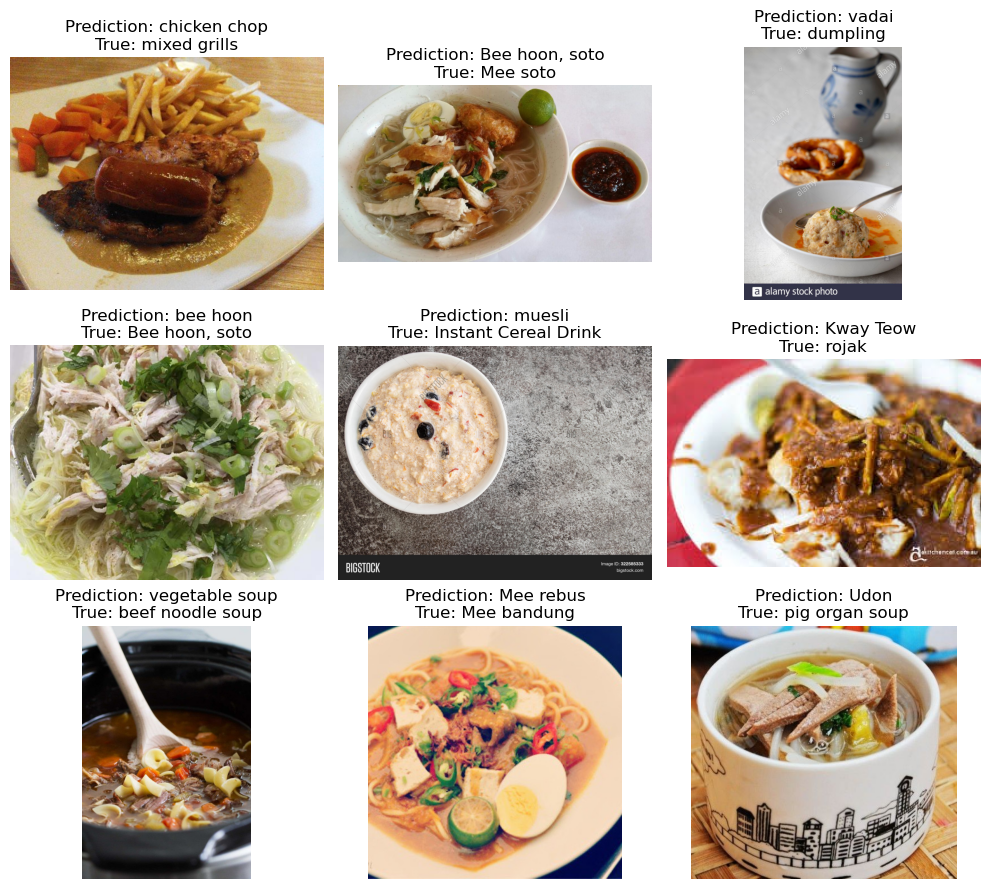

In [65]:
plt.figure(figsize=(10, 9))

for idx, row in mismatched_ensemble_result1.sample(9).reset_index(drop=True).iterrows():
    plt.subplot(3, 3, idx + 1)
    img = plt.imread(TEST_PATH + row["Filename"])
    plt.title("Prediction: " + row["Prediction"] + "\nTrue: " + row["True"])
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.tight_layout()

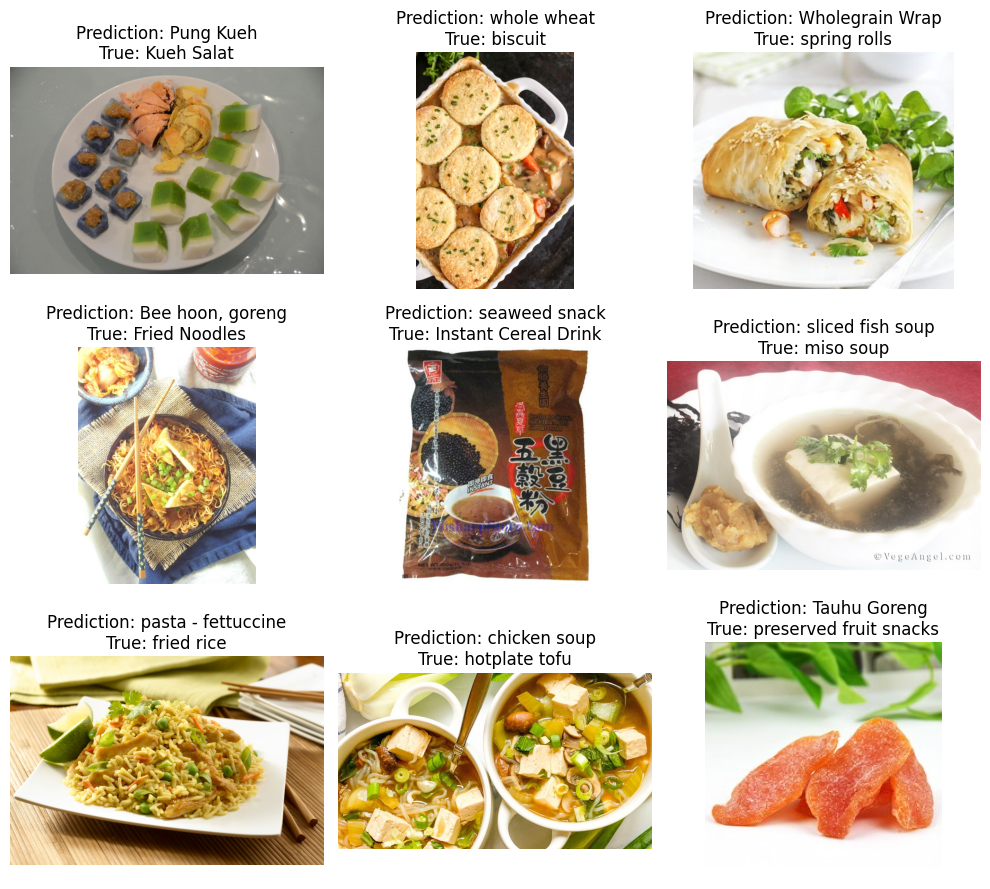

In [29]:
plt.figure(figsize=(10, 9))

for idx, row in mismatched_ensemble_result2.sample(9).reset_index(drop=True).iterrows():
    plt.subplot(3, 3, idx + 1)
    img = plt.imread(TEST_PATH + row["Filename"])
    plt.title("Prediction: " + row["Prediction"] + "\nTrue: " + row["True"])
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10, 9))

for idx, row in mismatched_ensemble_result3.sample(9).reset_index(drop=True).iterrows():
    plt.subplot(3, 3, idx + 1)
    img = plt.imread(TEST_PATH + row["Filename"])
    plt.title("Prediction: " + row["Prediction"] + "\nTrue: " + row["True"])
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.tight_layout()

In [ ]:
# mismatched_ensemble_result1.to_csv(MISMATCHED_ENSEMBLE_RESULT_PATHS[0], index=False)
# mismatched_ensemble_result2.to_csv(MISMATCHED_ENSEMBLE_RESULT_PATHS[1], index=False)
mismatched_ensemble_result3.to_csv(MISMATCHED_ENSEMBLE_RESULT_PATHS[2], index=False)